# Feature Engineering

> Coveage
>> 1. Data EDA
>> 2. Feature Selection
>> 3. Feature Sampling
>> 4. Data Scaling & Encoding

## 0. Import

In [117]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D, proj3d
from IPython.display import Image
from datetime import datetime

from scipy import stats
from scipy.stats import (
    chi2_contingency,
    kruskal,
    skew,
    kurtosis,
    uniform as sp_randFloat,
    randint as sp_randInt
)

from imblearn.combine import SMOTEENN

from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
)
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import (
    roc_auc_score,
    precision_recall_fscore_support
)
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

In [54]:
CONFIG = {
    'RANDOM_SEED' : 42
}

In [55]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'feature_engineering', 'german_credit_risk_data.csv'), sep=';')

df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [56]:
feature_names = df.columns.tolist()

feature_names

['Creditability',
 'Account_Balance',
 'Duration_of_Credit_monthly',
 'Payment_Status_of_Previous_Credit',
 'Purpose',
 'Credit_Amount',
 'Value_Savings_Stocks',
 'Length_of_current_employment',
 'Instalment_per_cent',
 'Sex_Marital_Status',
 'Guarantors',
 'Duration_in_Current_address',
 'Most_valuable_available_asset',
 'Age_years',
 'Concurrent_Credits',
 'Type_of_apartment',
 'No_of_Credits_at_this_Bank',
 'Occupation',
 'No_of_dependents',
 'Telephone',
 'Foreign_Worker']

## 1. Data EDA

### OverView

In [57]:
# Duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


In [58]:
# data types and summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [59]:
feature_names

['Creditability',
 'Account_Balance',
 'Duration_of_Credit_monthly',
 'Payment_Status_of_Previous_Credit',
 'Purpose',
 'Credit_Amount',
 'Value_Savings_Stocks',
 'Length_of_current_employment',
 'Instalment_per_cent',
 'Sex_Marital_Status',
 'Guarantors',
 'Duration_in_Current_address',
 'Most_valuable_available_asset',
 'Age_years',
 'Concurrent_Credits',
 'Type_of_apartment',
 'No_of_Credits_at_this_Bank',
 'Occupation',
 'No_of_dependents',
 'Telephone',
 'Foreign_Worker']

In [60]:
# Categorical and numerical columns
for feature_name in feature_names:
    print(
        f"Feature Name : {feature_name}",
        f"\nData Type : {df[feature_name].dtype}",
        f"\nUnique Values : {df[feature_name].unique()}\n"
    )

Feature Name : Creditability 
Data Type : int64 
Unique Values : [1 0]

Feature Name : Account_Balance 
Data Type : int64 
Unique Values : [1 2 4 3]

Feature Name : Duration_of_Credit_monthly 
Data Type : int64 
Unique Values : [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]

Feature Name : Payment_Status_of_Previous_Credit 
Data Type : int64 
Unique Values : [4 2 3 0 1]

Feature Name : Purpose 
Data Type : int64 
Unique Values : [ 2  0  9  3  1 10  5  4  6  8]

Feature Name : Credit_Amount 
Data Type : int64 
Unique Values : [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284 

In [61]:
categorical_feature_names = [
    "Creditability",
    "Account_Balance",
    "Payment_Status_of_Previous_Credit",
    "Purpose",
    "Length_of_current_employment",
    "Sex_Marital_Status",
    "Guarantors",
    "Duration_in_Current_address",
    "Most_valuable_available_asset",
    "Concurrent_Credits",
    "Type_of_apartment",
    "Occupation",
    "No_of_dependents",
    "Telephone",
    "Foreign_Worker"
]

numerical_feature_names = [feature_name for feature_name in feature_names if feature_name not in categorical_feature_names]

print(f"Categorical Features: {categorical_feature_names}")
print(f"Numerical Features: {numerical_feature_names}")

Categorical Features: ['Creditability', 'Account_Balance', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Length_of_current_employment', 'Sex_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Concurrent_Credits', 'Type_of_apartment', 'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker']
Numerical Features: ['Duration_of_Credit_monthly', 'Credit_Amount', 'Value_Savings_Stocks', 'Instalment_per_cent', 'Age_years', 'No_of_Credits_at_this_Bank']


In [62]:
for feature_name in categorical_feature_names:
    df[feature_name] = df[feature_name].astype("object")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Creditability                      1000 non-null   object
 1   Account_Balance                    1000 non-null   object
 2   Duration_of_Credit_monthly         1000 non-null   int64 
 3   Payment_Status_of_Previous_Credit  1000 non-null   object
 4   Purpose                            1000 non-null   object
 5   Credit_Amount                      1000 non-null   int64 
 6   Value_Savings_Stocks               1000 non-null   int64 
 7   Length_of_current_employment       1000 non-null   object
 8   Instalment_per_cent                1000 non-null   int64 
 9   Sex_Marital_Status                 1000 non-null   object
 10  Guarantors                         1000 non-null   object
 11  Duration_in_Current_address        1000 non-null   object
 12  Most_va

### Depandent Feature Explore

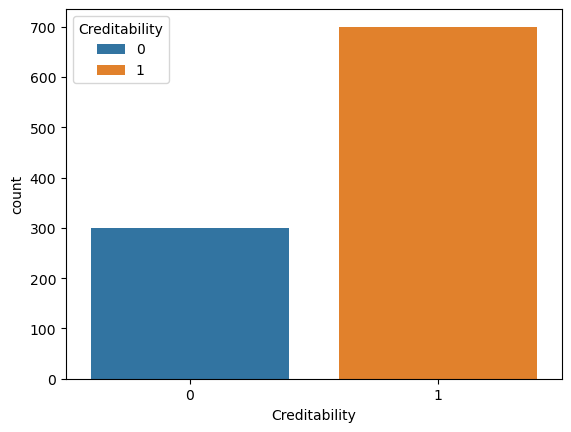

In [64]:
sns.countplot(x="Creditability", data=df, hue="Creditability")
plt.show()

### Independent Feature Explore

#### Categorical Features

In [65]:
TARGET_FEATURE_NAME = "Creditability"
categorical_feature_names.remove("Creditability")

cat_df = df[categorical_feature_names]

cat_df.head()

,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Length_of_current_employment,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Concurrent_Credits,Type_of_apartment,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,4,2,2,2,1,4,2,3,1,3,1,1,1
1,1,4,0,3,3,1,2,1,3,1,3,2,1,1
2,2,2,9,4,2,1,4,1,3,1,2,1,1,1
3,1,4,0,3,3,1,2,1,3,1,2,2,1,2
4,1,4,0,3,3,1,4,2,1,2,2,1,1,2


In [66]:
cat_df.nunique().sort_values()

No_of_dependents                      2
Telephone                             2
Foreign_Worker                        2
Guarantors                            3
Concurrent_Credits                    3
Type_of_apartment                     3
Account_Balance                       4
Sex_Marital_Status                    4
Duration_in_Current_address           4
Most_valuable_available_asset         4
Occupation                            4
Payment_Status_of_Previous_Credit     5
Length_of_current_employment          5
Purpose                              10
dtype: int64

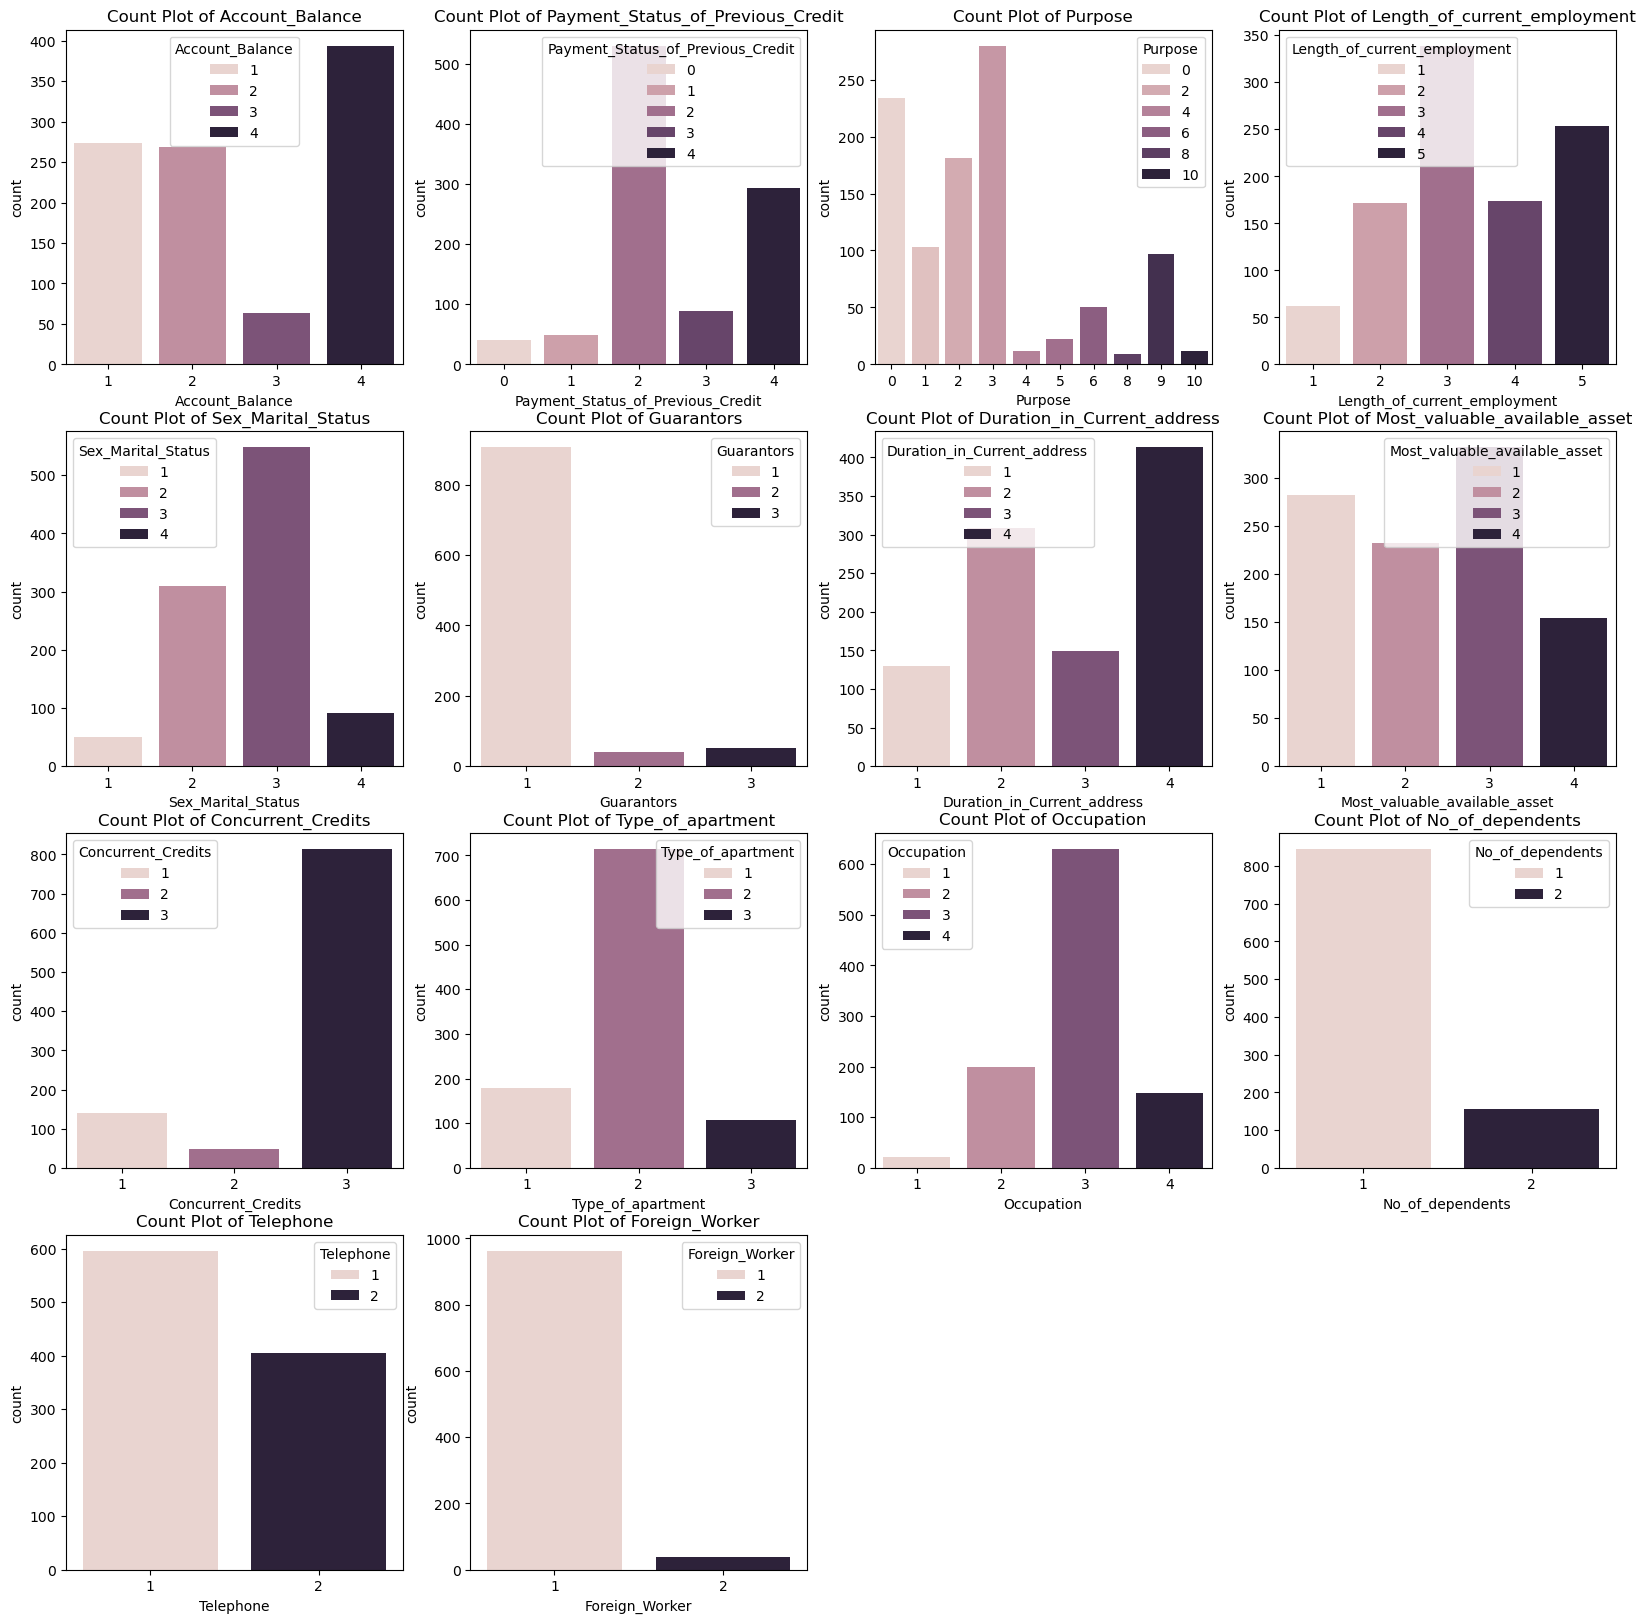

In [67]:
# Categorical Features 분포 확인
plt.figure(figsize=(20,20))
x = 1
for feature_name in cat_df.columns:
    plt.subplot(4,4,x)
    x+=1
    sns.countplot(x=feature_name, data=cat_df, hue=feature_name)
    plt.title(f"Count Plot of {feature_name}")
plt.show()

<Figure size 3000x3000 with 0 Axes>

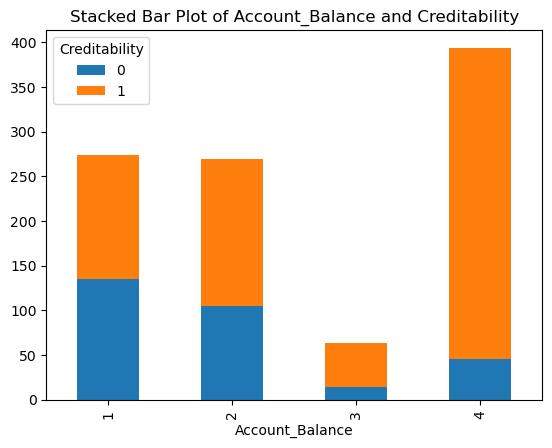

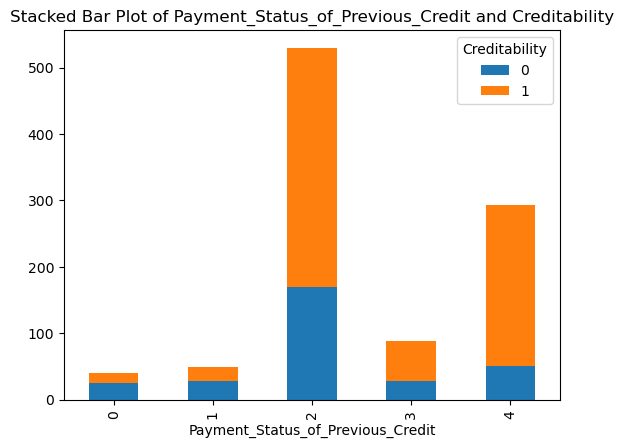

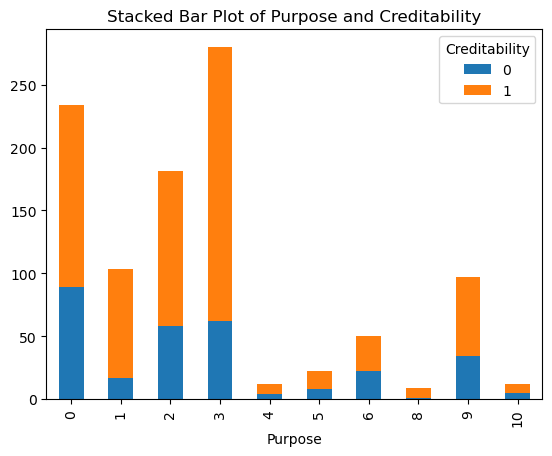

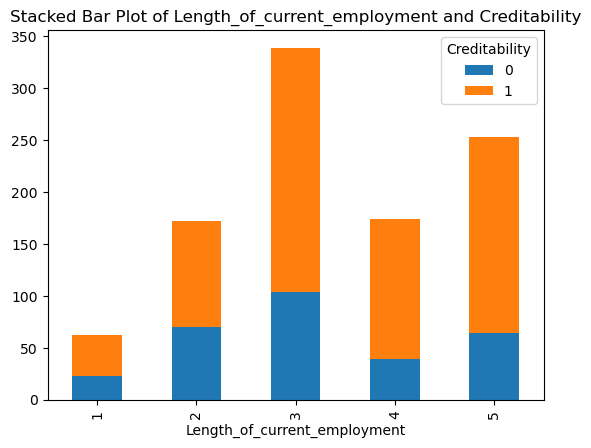

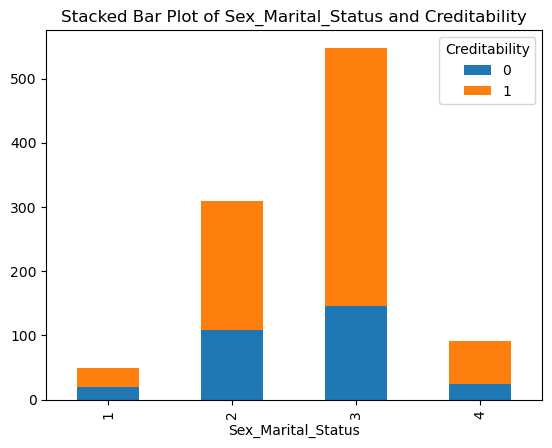

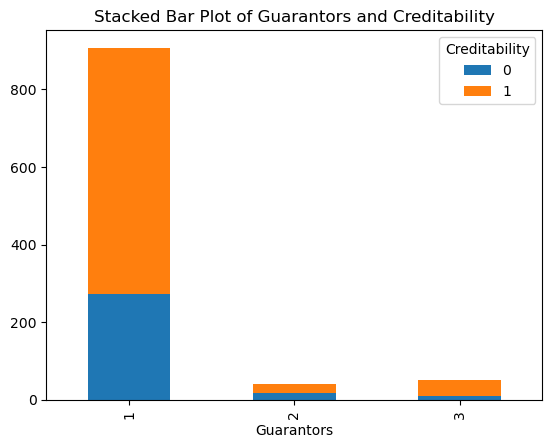

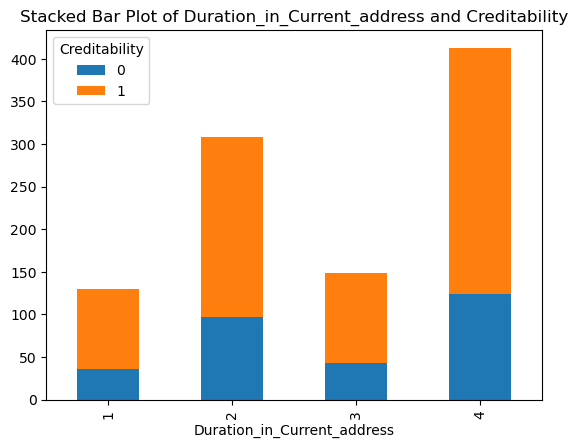

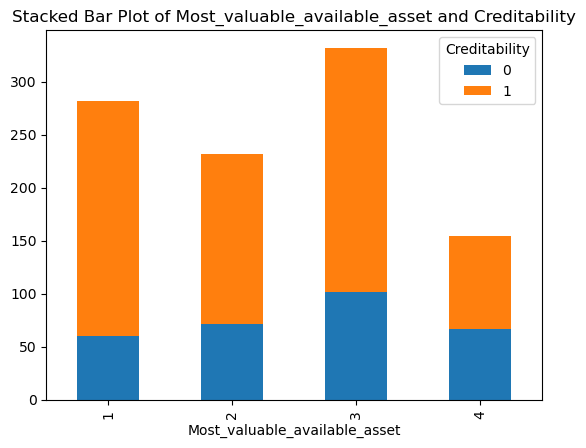

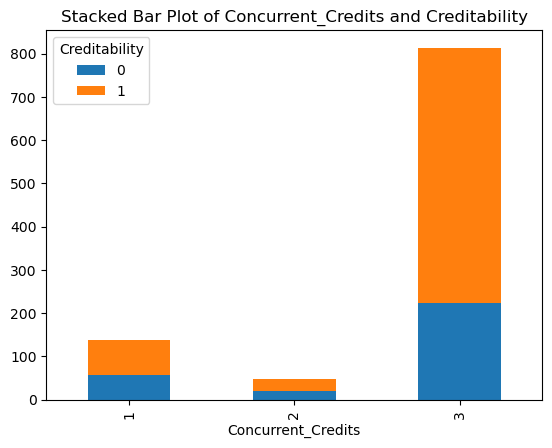

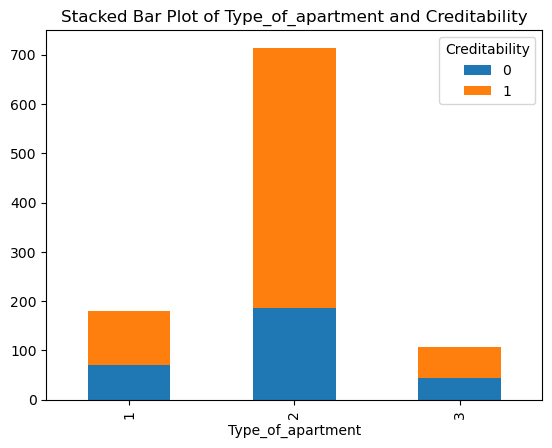

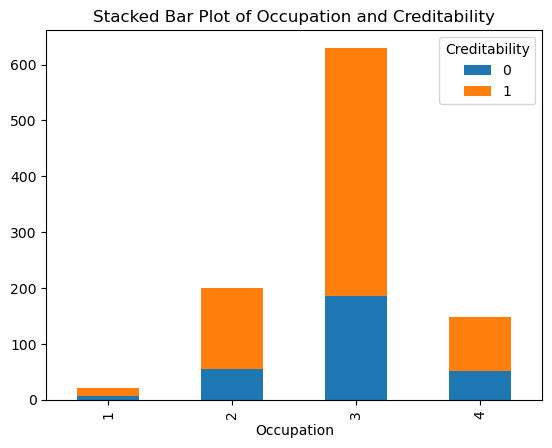

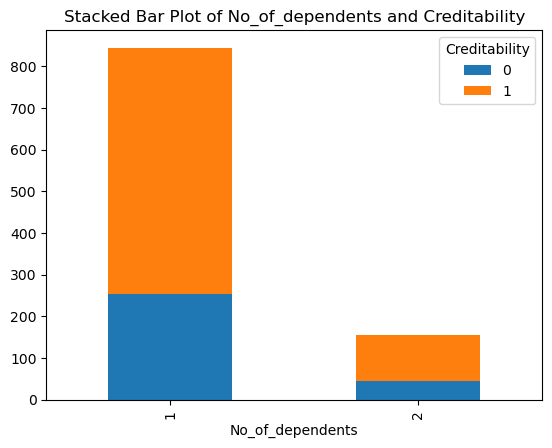

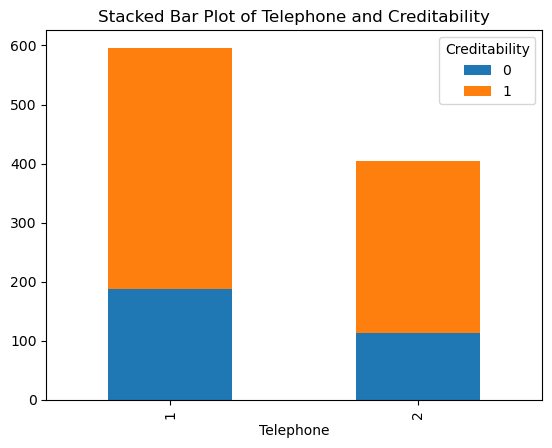

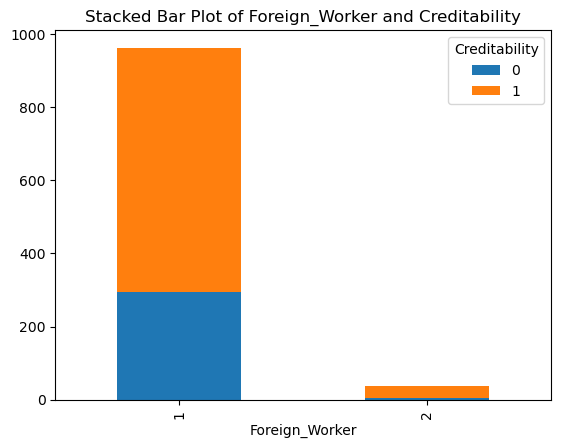

In [68]:
# Target Feature와 Categorical Feature 간 관계 확인
# '.unstack()' : .unstack() 메서드는 pandas의 MultiIndex를 가진 Series를 DataFrame으로 변환하는 메서드
plt.figure(figsize=(30,30))
for feature_name in cat_df.columns:
    df.groupby([feature_name, TARGET_FEATURE_NAME]).size().unstack().plot(kind="bar", stacked=True)
    plt.title(f"Stacked Bar Plot of {feature_name} and {TARGET_FEATURE_NAME}")
plt.show()

> Chi-Squar Test

In [69]:
pd.crosstab(df["Creditability"], df["Account_Balance"])

Account_Balance,1,2,3,4
Creditability,,,,
0,135,105,14,46
1,139,164,49,348


In [70]:
def get_meaningful_feature_by_chi2_test(data, target_feature_name, test_feature_names, p_value_threshold=0.05):
    meaningful_feature_names = []
    stats = []
    p_values = []

    for feature_name in test_feature_names:
        stat, p_value, _, _ = chi2_contingency(pd.crosstab(data[target_feature_name], data[feature_name]))
        if p_value <= p_value_threshold:
            meaningful_feature_names.append(feature_name)
            stats.append(stat)
            p_values.append(p_value)
    
    return {
        'features' : meaningful_feature_names,
        'stats' : stats,
        'p_values' : p_values,
    }


In [71]:
chi2_test = get_meaningful_feature_by_chi2_test(df, TARGET_FEATURE_NAME, categorical_feature_names)

for feature_name, stat, p_value in zip(chi2_test['features'], chi2_test['stats'], chi2_test['p_values']):
    print(
        f"Feature Name : {feature_name}",
        f"\nStat : {stat}",
        f"\nP-Value : {p_value}\n"
    )

Feature Name : Account_Balance 
Stat : 123.7209435162656 
P-Value : 1.218902072289376e-26

Feature Name : Payment_Status_of_Previous_Credit 
Stat : 61.69139696459551 
P-Value : 1.2791872956750918e-12

Feature Name : Purpose 
Stat : 33.35644686141815 
P-Value : 0.00011574910079691584

Feature Name : Length_of_current_employment 
Stat : 18.3682738466968 
P-Value : 0.0010454523491402544

Feature Name : Sex_Marital_Status 
Stat : 9.60521395933605 
P-Value : 0.022238005469268747

Feature Name : Guarantors 
Stat : 6.645366537264244 
P-Value : 0.036055954027247206

Feature Name : Most_valuable_available_asset 
Stat : 23.719551283864707 
P-Value : 2.858441573325003e-05

Feature Name : Concurrent_Credits 
Stat : 12.839187735866137 
P-Value : 0.0016293178186473534

Feature Name : Type_of_apartment 
Stat : 18.674005392894895 
P-Value : 8.810311250241031e-05

Feature Name : Foreign_Worker 
Stat : 5.821575915033861 
P-Value : 0.015830754902852903



4개의 categorical feature가 chi2 test를 통해 유의미하지 않다고 검정됨

#### Numerical Features

In [72]:
# numerical features
df[numerical_feature_names].nunique()

Duration_of_Credit_monthly     33
Credit_Amount                 923
Value_Savings_Stocks            5
Instalment_per_cent             4
Age_years                      53
No_of_Credits_at_this_Bank      4
dtype: int64

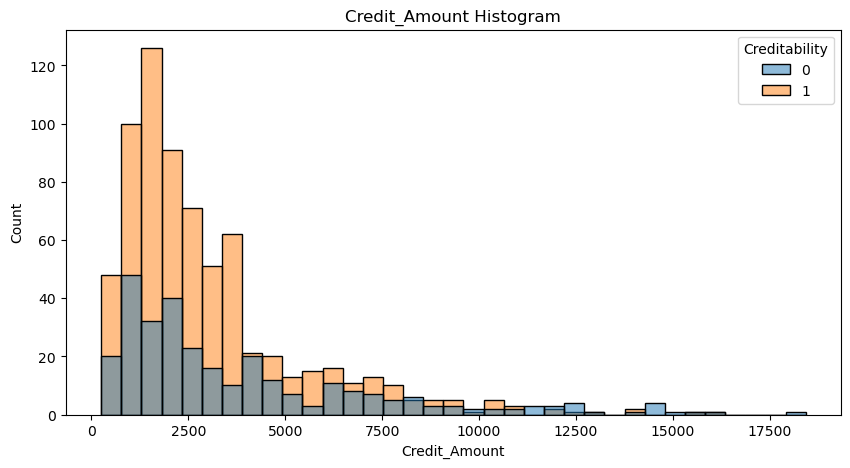

In [73]:
# Creadit Amount : 데이터 수와 거의 비슷한 유니크 값을 가지므로 histogram을 통해 분포 확인
plt.figure(figsize=(10,5))
sns.histplot(x="Credit_Amount", data=df, hue=TARGET_FEATURE_NAME)
plt.title("Credit_Amount Histogram")
plt.show()

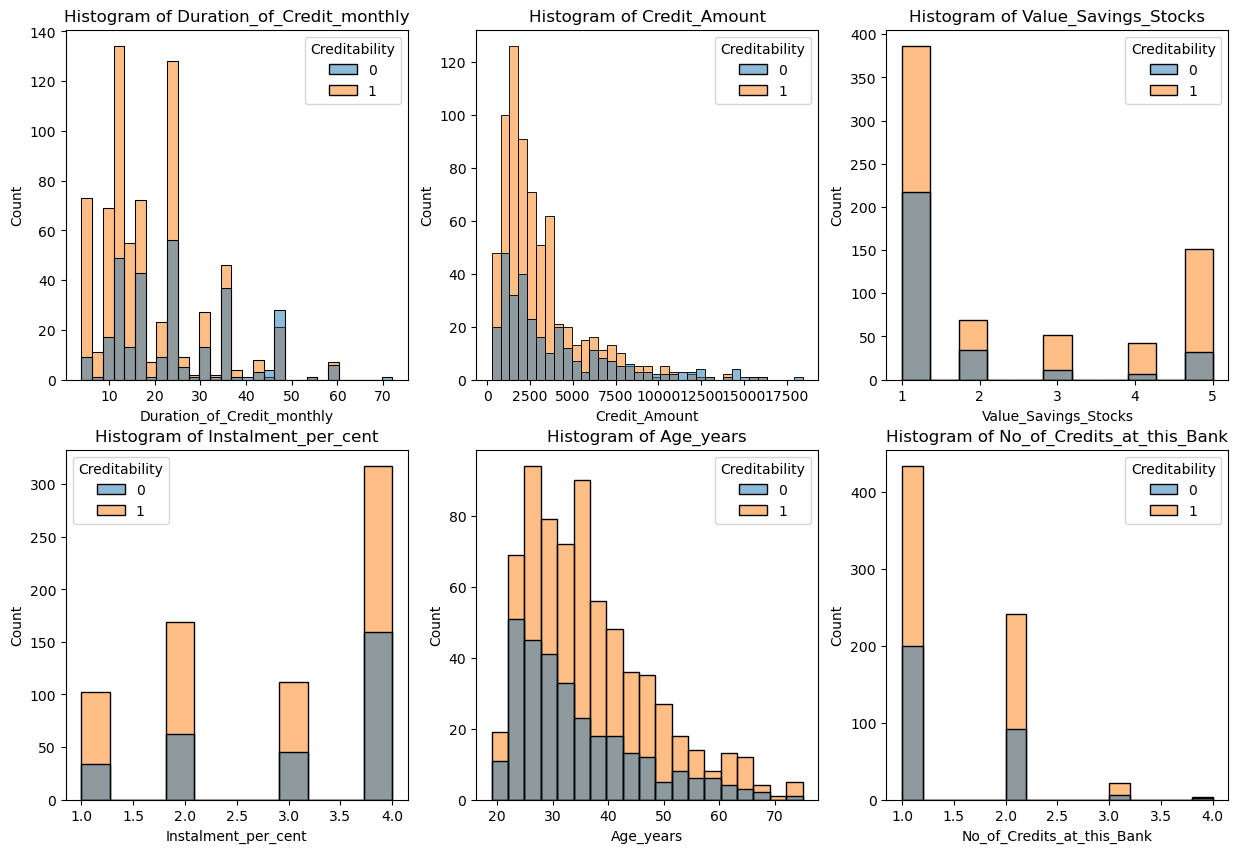

In [74]:
# Numerical Featrue 분포 확인

plt.figure(figsize=(15,10))
x = 1
for feature_name in numerical_feature_names:
    plt.subplot(2,3,x)
    x += 1
    sns.histplot(x=feature_name, data=df, hue=TARGET_FEATURE_NAME)
    plt.title(f"Histogram of {feature_name}")
plt.show()

In [75]:
# Scaling이 필요한 지 여부 알기 위해 왜도,첨도 확인 (skewness, kurtosis)
# 절댓값이 크면 분포에 극단치가 있으므로 Scaling을 검토할 수 있음
for feature_name in numerical_feature_names:
    print(
        f"Feature Name : {feature_name}",
        f"\nSkewness: {skew(df[feature_name])}",
        f"\nKurtosis: {kurtosis(df[feature_name])}\n",
    )

Feature Name : Duration_of_Credit_monthly 
Skewness: 1.0925422109540106 
Kurtosis: 0.9091948811374047

Feature Name : Credit_Amount 
Skewness: 1.9466686761323513 
Kurtosis: 4.265054224176543

Feature Name : Value_Savings_Stocks 
Skewness: 1.0151512255589377 
Kurtosis: -0.6828220851514768

Feature Name : Instalment_per_cent 
Skewness: -0.5305507598158565 
Kurtosis: -1.210423225610213

Feature Name : Age_years 
Skewness: 1.023174316054808 
Kurtosis: 0.6114371688367677

Feature Name : No_of_Credits_at_this_Bank 
Skewness: 1.2706663071344098 
Kurtosis: 1.5904343926328481



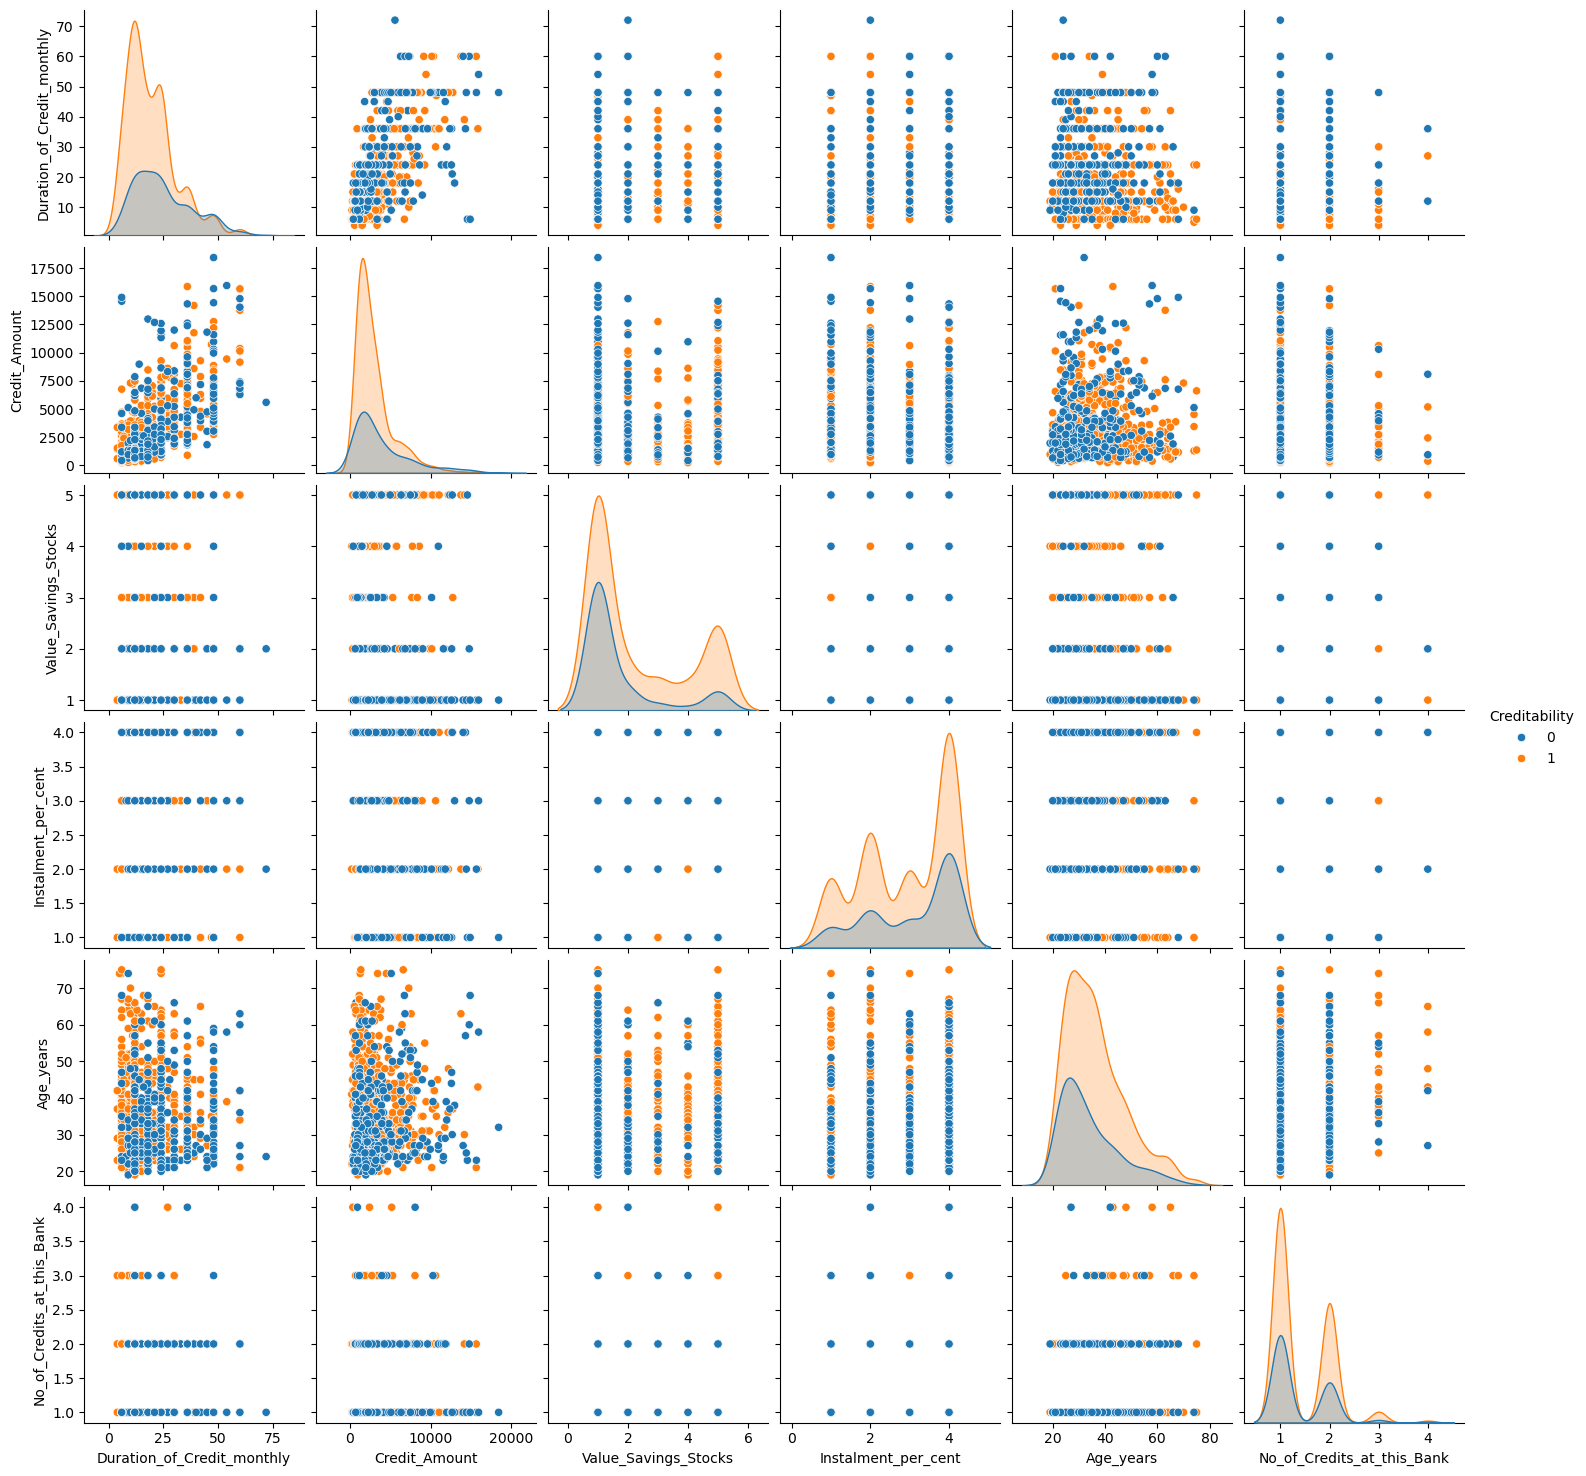

In [76]:
sns.pairplot(df[numerical_feature_names+["Creditability"]], hue=TARGET_FEATURE_NAME)
plt.show()

피어슨 상관게수 분석

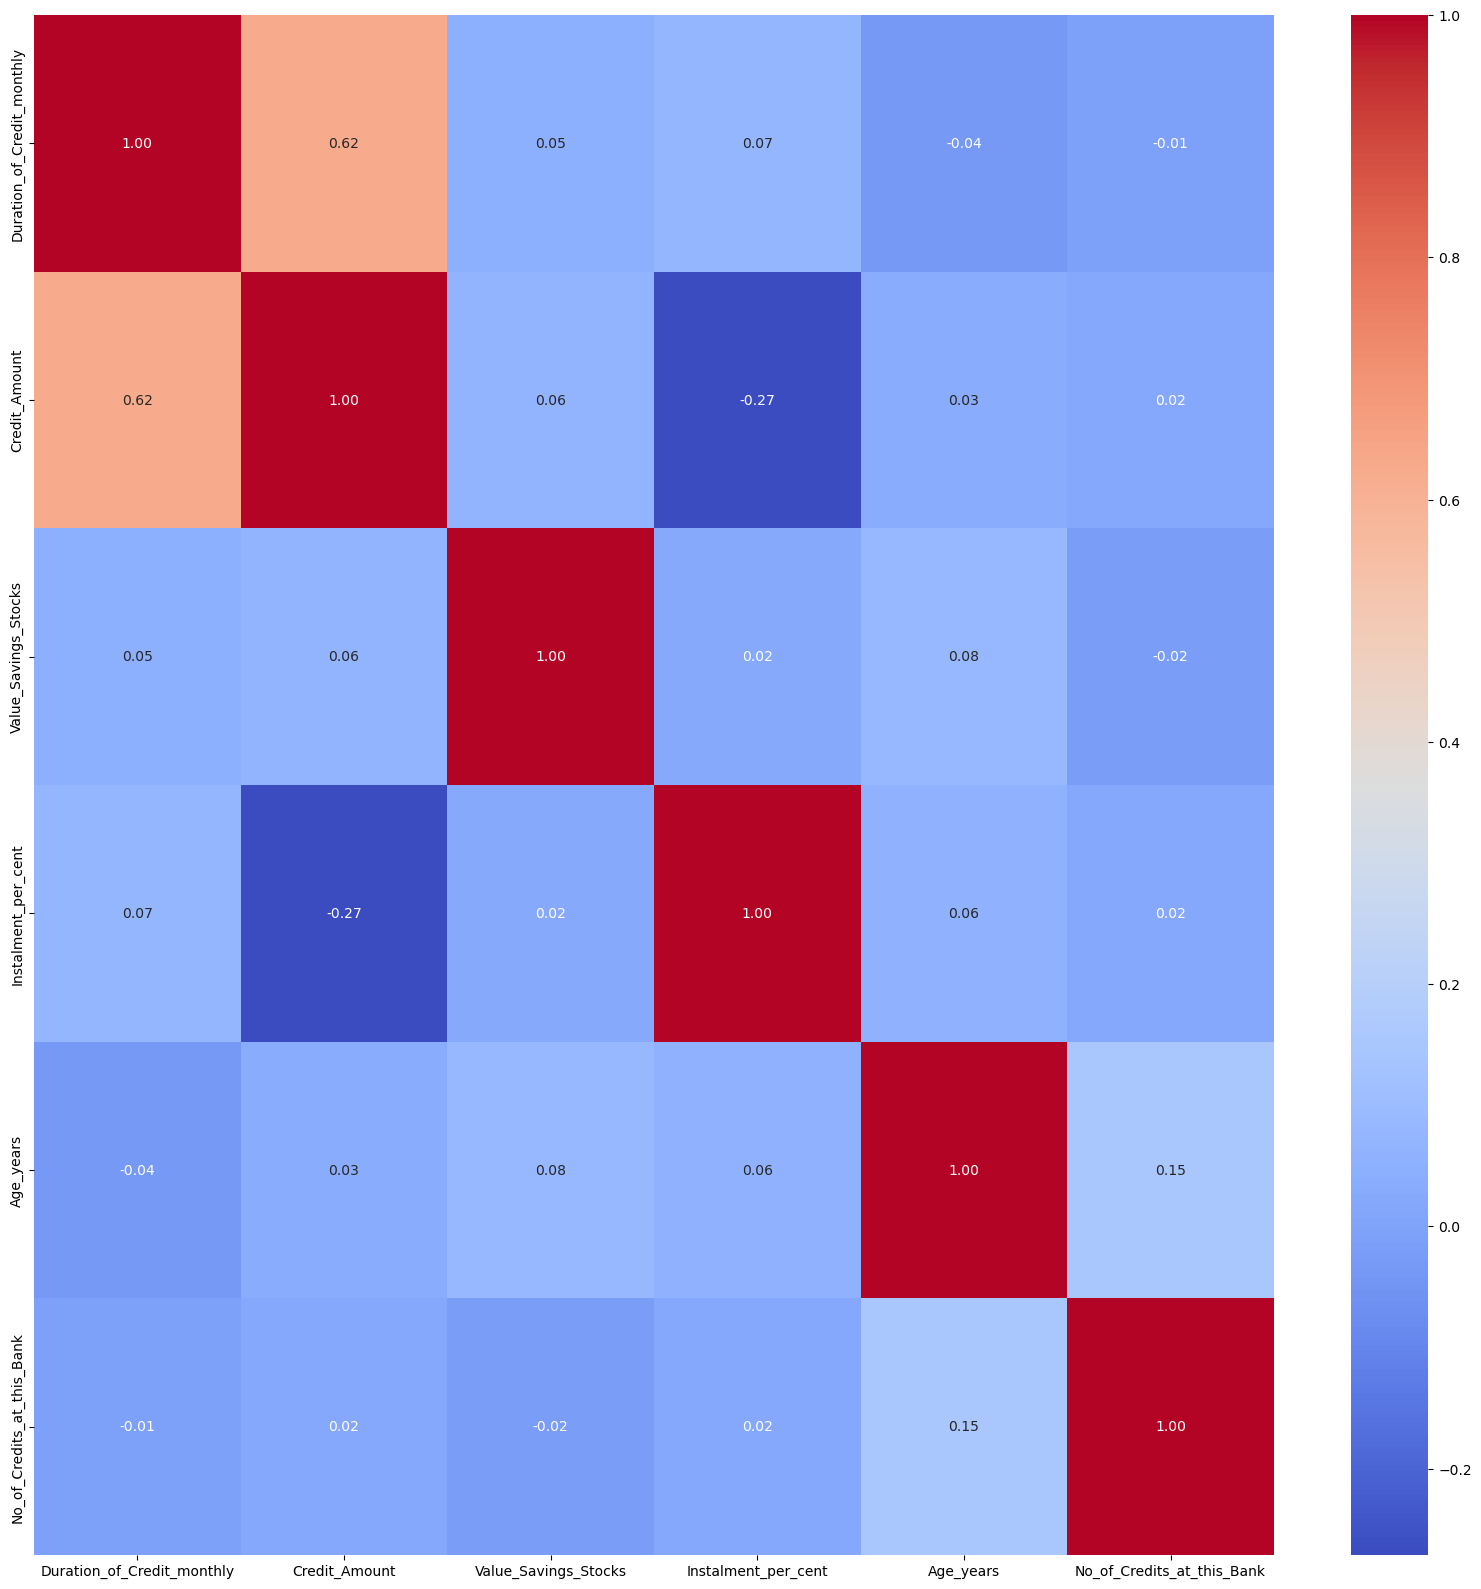

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_feature_names].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

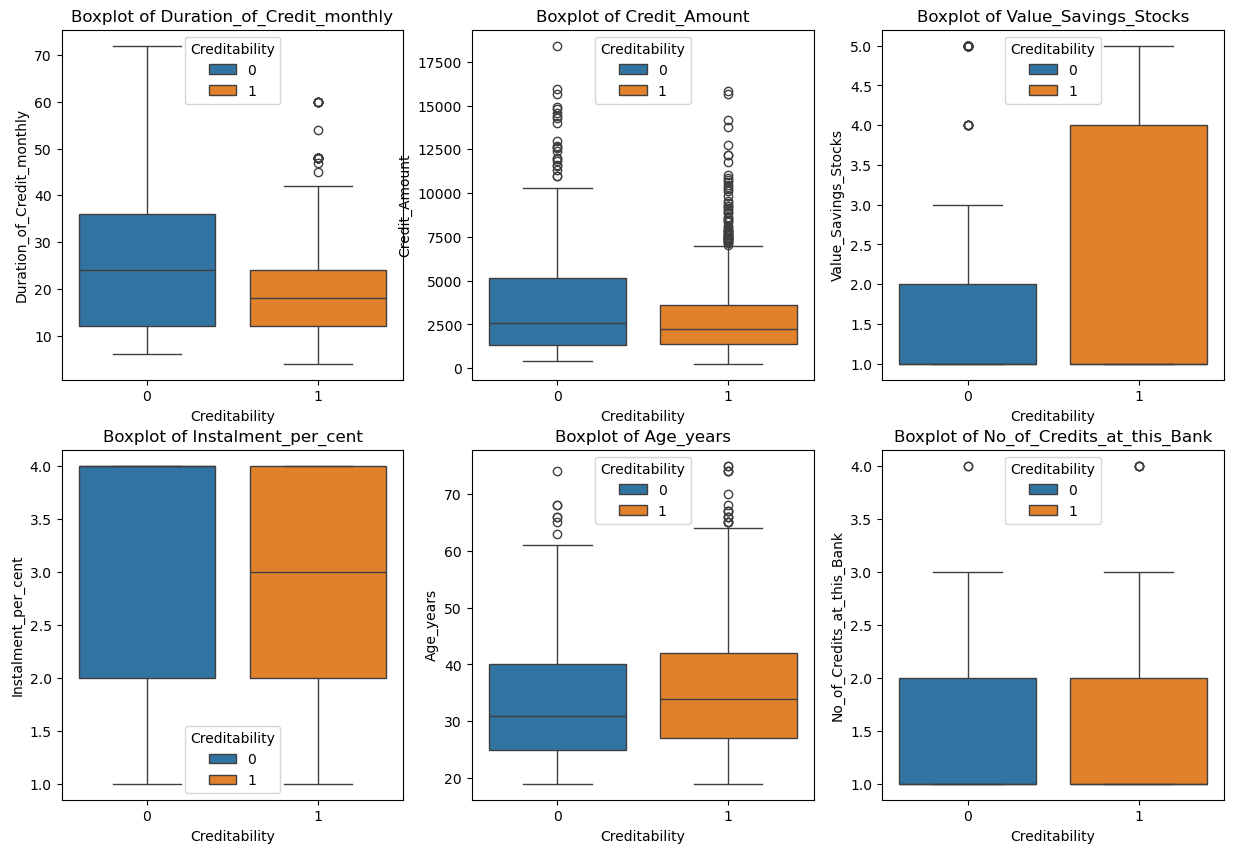

In [78]:
# Target Feature와 Numerical Feature 간 관계 확인
plt.figure(figsize=(15,10))
x = 1
for feature_name in numerical_feature_names:
    plt.subplot(2,3,x)
    x += 1
    sns.boxplot(data=df, x=TARGET_FEATURE_NAME, y=feature_name, hue=TARGET_FEATURE_NAME)
    plt.title(f"Boxplot of {feature_name}")
plt.show()


ANOVA 검정
> 카테고리별 numeric data 검증 가능
>> 전제 : 정규성, 독립성, 등분산성

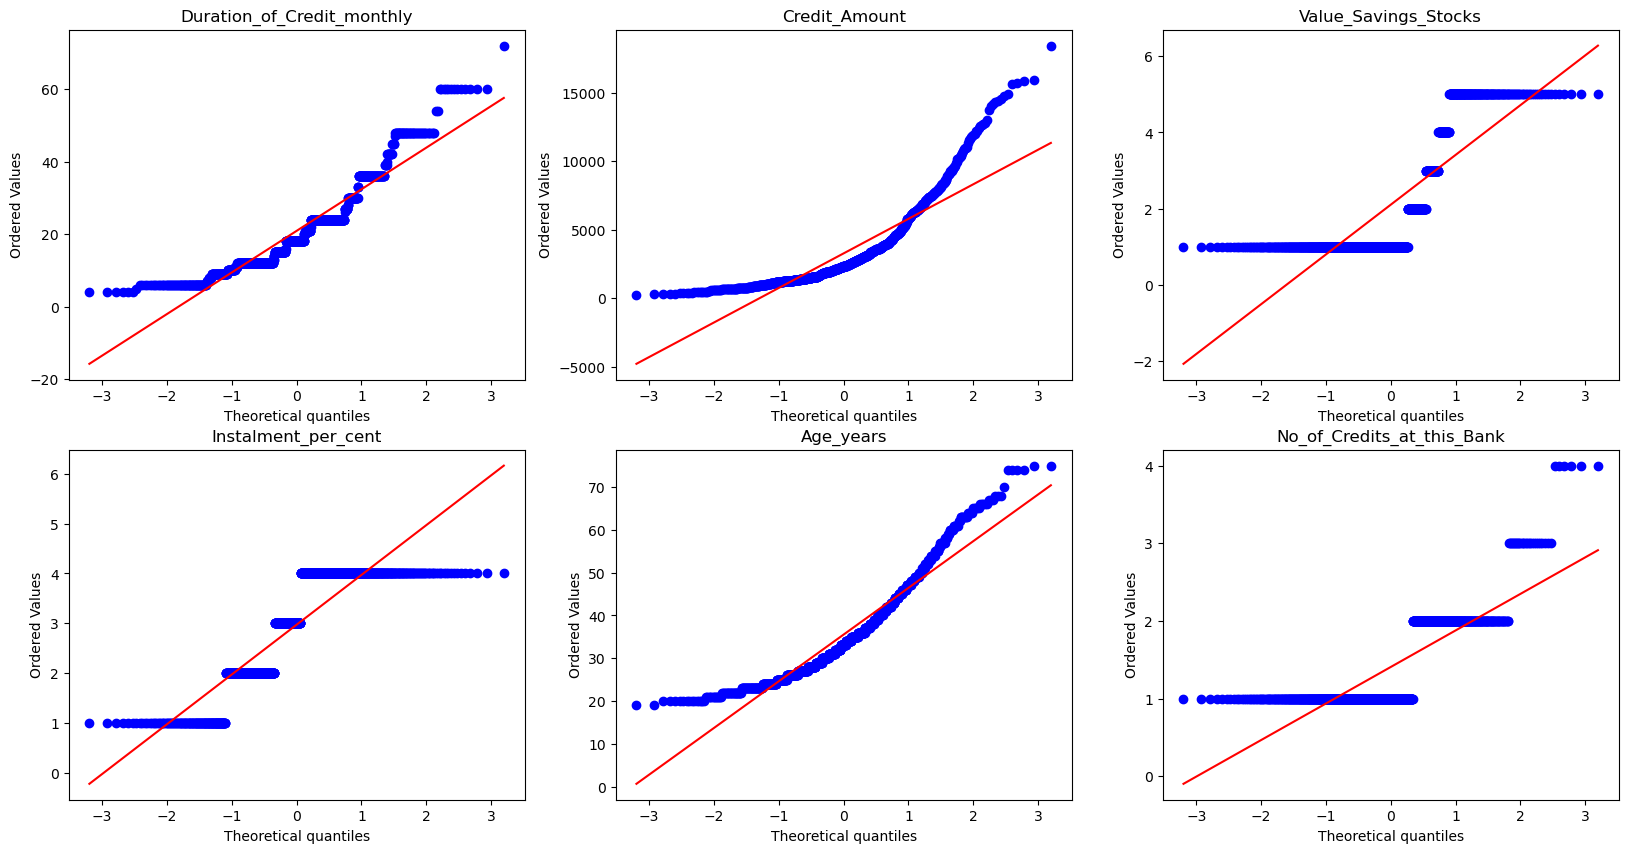

In [79]:
# 정규성 검정
# qqplot, shapiro wilk test 등
plt.figure(figsize=(20,10))
x=1
for feature_name in numerical_feature_names:
    plt.subplot(2,3,x)
    x+=1
    stats.probplot(df[feature_name], dist=stats.norm, plot=plt)
    plt.title(f"{feature_name}")
plt.show()

정규성을 만족한다고 보기 어려움
- 등분산성도 정규성을 전제하기 때문에 검증 불필요
- ANOVA 검정 불가

비모수 검정인 '크루스칼-왈리스 검정' 수행

In [80]:
def get_meaningful_feature_by_kruskal_test(data, target_feature_name, test_feature_names, p_value_threshold=0.05):
    """
    Kruskal-Wallis test를 통해 numerical feature에 대해 비모수 검정을 수행합니다.

    Args:
    - data : test를 수행할 데이터 (pd.DataFrame)
    - target_feature_name : target feature 명 (str)
    - test_feature_names : test를 수행할 numerical feature 이름들 (list[str])

    Returns:
    - Dictionary :
        - 'features' : 의미있는 feature 이름들 (list[str])
        - 'stats' : 각 feature에 대한 검정 결과 (list[float])
        - 'p_values' : 각 feature에 대한 p-value (list[float])
    """
    meaningful_feature = []
    stats = []
    p_values = []

    target_values = data[target_feature_name]

    for feature_name in test_feature_names:
        groups = []
        for target_value in target_values:
            group = data.loc[data[target_feature_name] == target_value, feature_name].dropna()
            groups.append(group)
        
        stat, p_value = kruskal(*groups)

        if p_value <= p_value_threshold:
            meaningful_feature.append(feature_name)
            stats.append(stat)
            p_values.append(p_value)

    return {
        'features' : meaningful_feature,
        'stats' : stats,
        'p_values' : p_values
    }

In [81]:
kruskal_test_result = get_meaningful_feature_by_kruskal_test(df, TARGET_FEATURE_NAME, numerical_feature_names)

for feature_name, stat, p_value in zip(kruskal_test_result['features'], kruskal_test_result['stats'], kruskal_test_result['p_values']):
    print(
        f"\nFeature Name : {feature_name}",
        f"\nStat : {stat}",
        f"\nP-Value : {p_value}\n"
    )


Feature Name : Duration_of_Credit_monthly 
Stat : 15319.322461580217 
P-Value : 0.0


Feature Name : Credit_Amount 
Stat : 2745.732896133622 
P-Value : 1.0883126656227867e-162


Feature Name : Value_Savings_Stocks 
Stat : 10775.110071536517 
P-Value : 0.0


Feature Name : Instalment_per_cent 
Stat : 1952.2023774900113 
P-Value : 4.1593780117288635e-64


Feature Name : Age_years 
Stat : 4642.686296474926 
P-Value : 0.0



#### Missing Values

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Creditability                      1000 non-null   object
 1   Account_Balance                    1000 non-null   object
 2   Duration_of_Credit_monthly         1000 non-null   int64 
 3   Payment_Status_of_Previous_Credit  1000 non-null   object
 4   Purpose                            1000 non-null   object
 5   Credit_Amount                      1000 non-null   int64 
 6   Value_Savings_Stocks               1000 non-null   int64 
 7   Length_of_current_employment       1000 non-null   object
 8   Instalment_per_cent                1000 non-null   int64 
 9   Sex_Marital_Status                 1000 non-null   object
 10  Guarantors                         1000 non-null   object
 11  Duration_in_Current_address        1000 non-null   object
 12  Most_va

In [83]:
df.isna().sum().sort_values(ascending=True)

Creditability                        0
No_of_dependents                     0
Occupation                           0
No_of_Credits_at_this_Bank           0
Type_of_apartment                    0
Concurrent_Credits                   0
Age_years                            0
Most_valuable_available_asset        0
Duration_in_Current_address          0
Telephone                            0
Guarantors                           0
Instalment_per_cent                  0
Length_of_current_employment         0
Value_Savings_Stocks                 0
Credit_Amount                        0
Purpose                              0
Payment_Status_of_Previous_Credit    0
Duration_of_Credit_monthly           0
Account_Balance                      0
Sex_Marital_Status                   0
Foreign_Worker                       0
dtype: int64

## 2. Encoding & Feature Selection

In [90]:
target = df[TARGET_FEATURE_NAME]
input = df.drop(columns=TARGET_FEATURE_NAME)

### Encoding

#### Label Encoding

In [91]:
label_encoder = LabelEncoder()

encoded_target = label_encoder.fit_transform(target)

encoded_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Feature Selection

In [92]:
selected_input = input[chi2_test['features'] + kruskal_test_result['features']]

selected_input

,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Length_of_current_employment,Sex_Marital_Status,Guarantors,Most_valuable_available_asset,Concurrent_Credits,Type_of_apartment,Foreign_Worker,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years
0,1,4,2,2,2,1,2,3,1,1,18,1049,1,4,21
1,1,4,0,3,3,1,1,3,1,1,9,2799,1,2,36
2,2,2,9,4,2,1,1,3,1,1,12,841,2,2,23
3,1,4,0,3,3,1,1,3,1,2,12,2122,1,3,39
4,1,4,0,3,3,1,2,1,2,2,12,2171,1,4,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,3,3,3,1,1,3,1,1,24,1987,1,2,21
996,1,2,0,5,3,2,1,3,2,1,24,2303,1,4,45
997,4,4,0,5,3,1,4,3,3,1,21,12680,5,4,30
998,2,2,3,1,3,1,4,3,2,1,12,6468,5,2,52


## 3. Feature Transformation

### Scaling

#### Standard Scaler

In [93]:
standard_scaler = StandardScaler()

selected_input.loc[:, kruskal_test_result['features']] = standard_scaler.fit_transform(selected_input.loc[:, kruskal_test_result['features']])

selected_input.head()

/var/folders/5z/57z97fnx0bsg5tc6bbg_p8s00000gn/T/ipykernel_37577/896250607.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.24085723 -0.9875727  -0.73866754 -0.73866754 -0.73866754 -0.90460432
 -1.07054109 -1.23647786 -0.24085723  0.25695309 -0.82163593  0.75476341
 -1.23647786  2.24819436 -0.24085723 -1.23647786 -0.82163593 -0.24085723
  1.25257373 -0.82163593 -1.23647786 -0.73866754  1.25257373 -0.73866754
 -1.23647786 -0.82163593 -0.73866754 -0.9875727  -0.48976238  1.75038404
  0.75476341  1.25257373  1.25257373  0.25695309 -0.48976238 -1.23647786
 -0.73866754 -0.73866754 -0.24085723  0.25695309 -0.73866754  0.25695309
 -0.24085723  0.25695309 -0.24085723 -0.24085723  0.25695309 -0.24085723
  0.25695309  0.25695309 -0.73866754  1.25257373 -0.9875727  -0.73866754
  0.25695309 -0.73866754 -0.73866754 -0.48976238  0.00804793  1.25257373
 -0.73866754  0.25695309  2.24819436  1.25257373 -0.73866754 -1.2364778

,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Length_of_current_employment,Sex_Marital_Status,Guarantors,Most_valuable_available_asset,Concurrent_Credits,Type_of_apartment,Foreign_Worker,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years
0,1,4,2,2,2,1,2,3,1,1,-0.240857,-0.787657,-0.699707,0.918477,-1.281573
1,1,4,0,3,3,1,1,3,1,1,-0.987573,-0.167384,-0.699707,-0.870183,0.040363
2,2,2,9,4,2,1,1,3,1,1,-0.738668,-0.861381,-0.066488,-0.870183,-1.105315
3,1,4,0,3,3,1,1,3,1,2,-0.738668,-0.407341,-0.699707,0.024147,0.304750
4,1,4,0,3,3,1,2,1,2,2,-0.738668,-0.389974,-0.699707,0.918477,0.216621


### OneHot Encoding For categorical feature

In [94]:
selected_input = pd.get_dummies(selected_input, dtype=int)

selected_input

,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years,Account_Balance_1,Account_Balance_2,Account_Balance_3,Account_Balance_4,Payment_Status_of_Previous_Credit_0,...,Most_valuable_available_asset_3,Most_valuable_available_asset_4,Concurrent_Credits_1,Concurrent_Credits_2,Concurrent_Credits_3,Type_of_apartment_1,Type_of_apartment_2,Type_of_apartment_3,Foreign_Worker_1,Foreign_Worker_2
0,-0.240857,-0.787657,-0.699707,0.918477,-1.281573,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,-0.987573,-0.167384,-0.699707,-0.870183,0.040363,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,-0.738668,-0.861381,-0.066488,-0.870183,-1.105315,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,-0.738668,-0.407341,-0.699707,0.024147,0.304750,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,-0.738668,-0.389974,-0.699707,0.918477,0.216621,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.256953,-0.455191,-0.699707,-0.870183,-1.281573,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
996,0.256953,-0.343187,-0.699707,0.918477,0.833525,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
997,0.008048,3.334852,1.833169,0.918477,-0.488411,0,0,0,1,0,...,0,1,0,0,1,0,0,1,1,0
998,-0.738668,1.133062,1.833169,-0.870183,1.450428,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [95]:
selected_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Duration_of_Credit_monthly           1000 non-null   float64
 1   Credit_Amount                        1000 non-null   float64
 2   Value_Savings_Stocks                 1000 non-null   float64
 3   Instalment_per_cent                  1000 non-null   float64
 4   Age_years                            1000 non-null   float64
 5   Account_Balance_1                    1000 non-null   int64  
 6   Account_Balance_2                    1000 non-null   int64  
 7   Account_Balance_3                    1000 non-null   int64  
 8   Account_Balance_4                    1000 non-null   int64  
 9   Payment_Status_of_Previous_Credit_0  1000 non-null   int64  
 10  Payment_Status_of_Previous_Credit_1  1000 non-null   int64  
 11  Payment_Status_of_Previous_Cred

## 4. Resampling For Imbalabced Data

In [96]:
train_input, test_input, train_target, test_target = train_test_split(
    selected_input,
    encoded_target,
    test_size=0.2,
    stratify=encoded_target
)

### SMOTEENN

In [97]:
smoteenn = SMOTEENN(random_state=CONFIG['RANDOM_SEED'])
resampled_train_input, resampled_train_target = smoteenn.fit_resample(train_input, train_target)

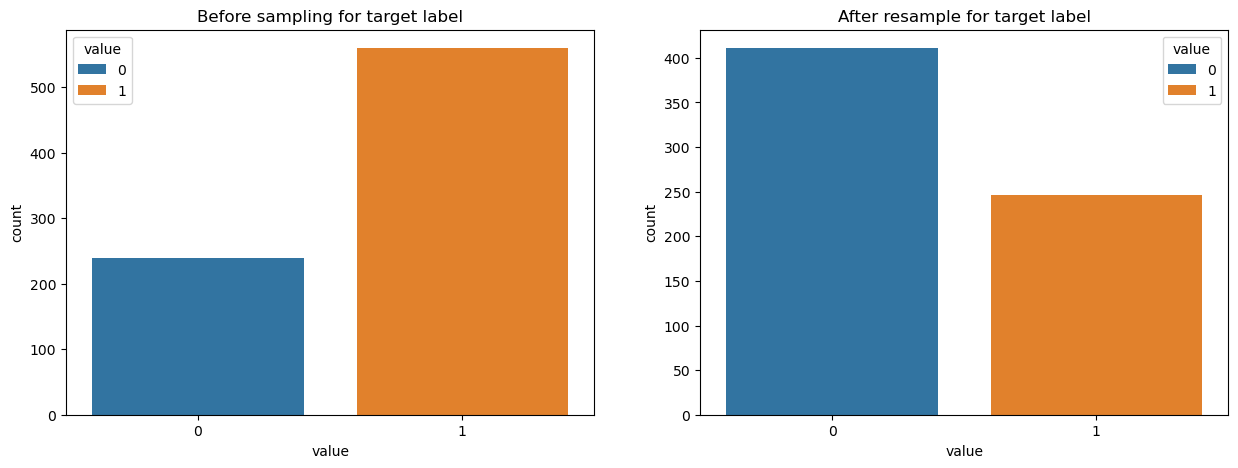

In [116]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1,2,1)
df_tmp = pd.DataFrame(train_target, columns=['value'])
sns.countplot(x='value', data=df_tmp, hue='value')
plt.title("Before sampling for target label")

fig.add_subplot(1,2,2)
df_tmp = pd.DataFrame(resampled_train_target, columns=['value'])
sns.countplot(x='value', data=df_tmp, hue='value')
plt.title("After resample for target label")
plt.show()

## 5. Feature Reduction

In [118]:
pca = PCA(n_components = 10)
pca_reduced_input = pca.fit_transform(resampled_train_input)

In [119]:
print(
    f"Original Shape : {np.array(resampled_train_input).shape}",
    f"\nReduced Shape : {np.array(pca_reduced_input).shape}"
)

Original Shape : (657, 48) 
Reduced Shape : (657, 10)
